<h1>Mushroom Classification</h1>

Name: Jonathan Menahem <br>
ID: 203772611 <br>


<h2>Links:</h2>

[**Kaggle**](https://www.kaggle.com/uciml/mushroom-classification)

[**Markdown syntax**](https://www.markdownguide.org/basic-syntax/)


In [54]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h1>Data Exploration</h1>

<h2>1. Downloading the dataset into dataframe</h2>

In [55]:
# load data into dataframe

original_data = pd.read_csv('mushrooms.csv')

<h2>2. Review of the different features</h2>

In [56]:
# dataframe's features
original_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [57]:
# All data type are 'object':

original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<h2>3. We should check for alphanumeric values and change them from 'object' to 'float' using encoding methods</h2>


In [58]:
# encoding alphanumeric values using 'label encoding' method

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_data = pd.read_csv('mushrooms.csv')


In [59]:
for i in le_data:
    le_data[i] = le.fit_transform(le_data[i])

In [60]:
le_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [61]:
# encoding alphanumeric values using 'hot-end encoding' method (pd.get_dummies)
one_hot_encoded_training_predictors = pd.get_dummies(original_data)

In [62]:
one_hot_encoded_training_predictors.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


<h2>4. Distribution of the different features</h2>

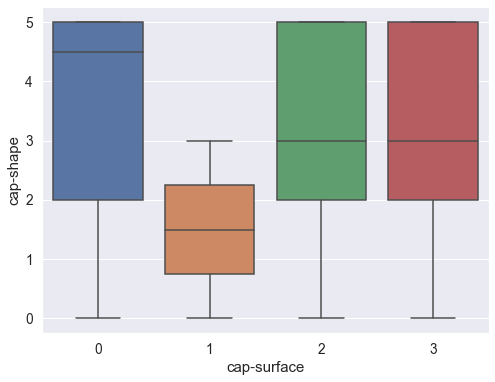

In [63]:
# distribution of different features using 'boxplot'

# box plot cap-surface/cap-shape

var = 'cap-surface'
data = pd.concat([le_data['cap-shape'], le_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="cap-shape", data=data)

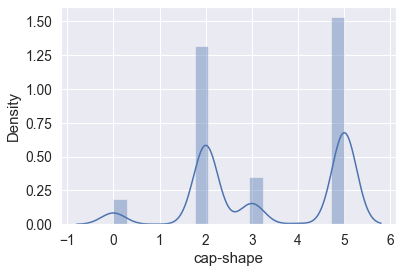

In [64]:
# distribution of different features using 'distplot'

sns.distplot(le_data['cap-shape']);

In [65]:
# pandas profiling report

import pandas_profiling as pp

pp.ProfileReport(original_data, title = 'Pandas Profiling report of data', html = {'style':{'full_width': True}})

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


<h2>5. Checking for missing values</h2>

In [66]:
# we can see that 'veil-type' is a constant so we should remove it from the datasaet

le_sorted_data = le_data.drop(['veil-type'], axis=1)
ho_sorted_data = one_hot_encoded_training_predictors.drop(['veil-type_p'], axis=1)

<h2>6. Plotting the correlation matrix</h2>

In [67]:
# displaying the correlation matrix using the 'hotone encoded' data

le_matrix = pd.get_dummies(le_sorted_data)
le_matrix.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


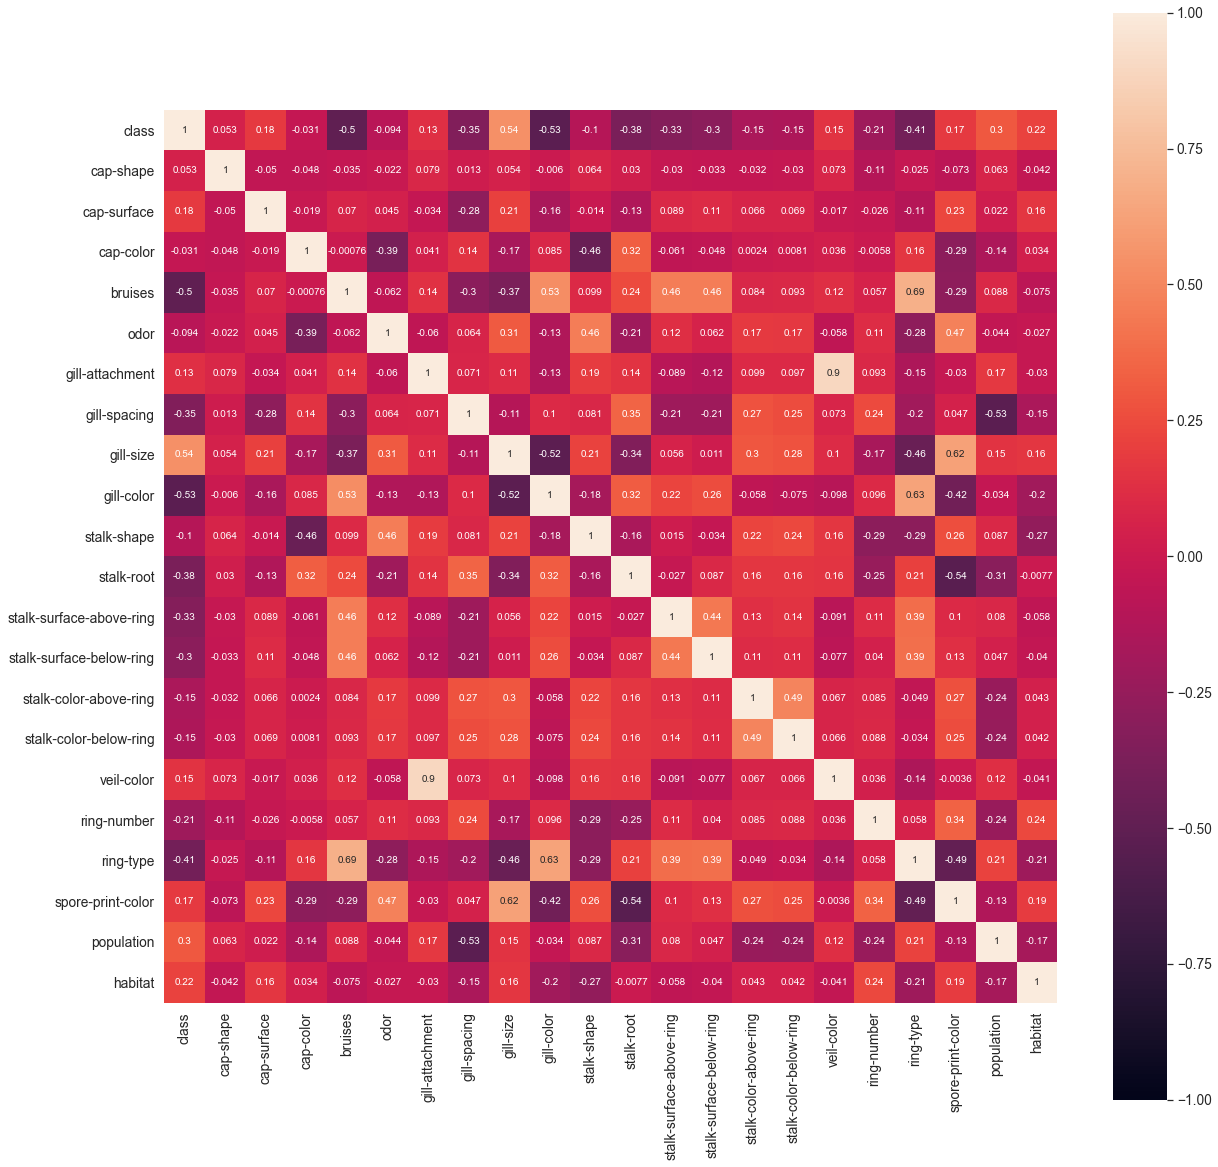

In [68]:
# correlation matrix of all features 

plt.figure(figsize=(20, 20))
corrMatrix = le_matrix.corr()
sns.heatmap(corrMatrix, vmin=-1, vmax=1, square=True, annot=True)
plt.show()

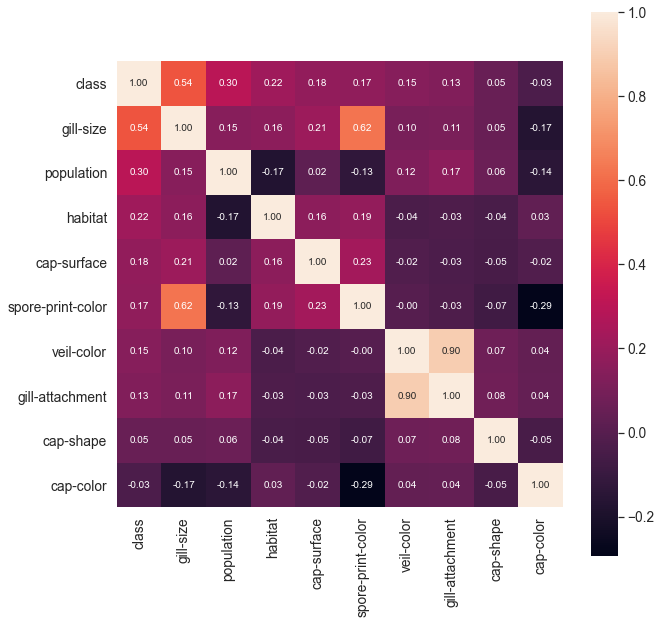

In [69]:
# correlation matrix of 'k' higly correlated features (correlated with class)

plt.figure(figsize=(10, 10))
k = 10 #number of variables for heatmap
cols = corrMatrix.nlargest(k, 'class')['class'].index
cm = np.corrcoef(le_matrix[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<h2>7. Identify the most important features the highly correlat with poisonous</h2>

In my opinion the most segnificant featurs are: gill size, population, habitat, cap-surface, spore print color, veil color and gill attachment

In [70]:
# Load data - Here i am using the 'label encoder' (le) data

X_le = le_sorted_data.filter(['gill-size', 'population', 'habitat', 'cap-surface', 'spore-print-color', 'veil-color', 'gill-attachment']) # contains only the features relevant in my opinion 
# X_le = le_sorted_data.drop(['class'], axis=1) # contains *all* features 
y_le = le_sorted_data.iloc[:, :1] # labels only (outcome)


<h1>Model Development</h1>

<h2>8. Splitting the dataset into 3 parts: Training, Validation, and Test</h2>

In [71]:
from sklearn.model_selection import train_test_split

# splitting sorted data to train 85% and test 15% :
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size=0.15, random_state=1) 

# splitting train data output to new train data containing 70% of total data and 15% validation data:
X_train_le, X_val_le, y_train_le, y_val_le = train_test_split(X_train_le, y_train_le, test_size=0.176, random_state=1) 

<h2>9. Using two of the classifiers we've learned, evaluate the poisonous of the mushrooms. Compare the results</h2>


In [72]:
# a table to contain all the results for model training, validation and test for later comparison

scores = pd.DataFrame(columns=['train accuracy','validation accuracy','test accuracy'],index=['knn','tree','forest'])

<h1>** I ended up using three classifies just for practice like we did in class, I hope thats OK</h1>

# KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

neigh = KNeighborsClassifier()
neigh.fit(X_train_le, y_train_le)
scores.at['knn','train accuracy'] = neigh.score(X_train_le, y_train_le)
scores.at['knn','validation accuracy'] = neigh.score(X_val_le, y_val_le)
scores.at['knn','test accuracy'] = neigh.score(X_test_le, y_test_le)

<AxesSubplot:>

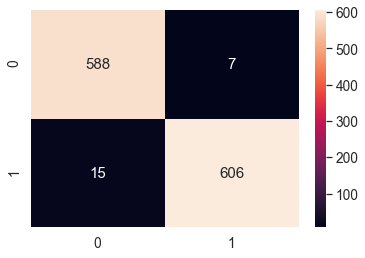

In [74]:
# confusion matrix for validation

conf_val = confusion_matrix(y_val_le, neigh.predict(X_val_le))
sns.heatmap(conf_val, annot=True, fmt="d")

<AxesSubplot:>

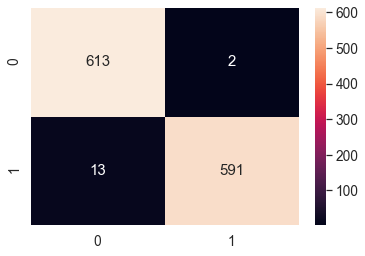

In [75]:
# confusion matrix for test

conf_test = confusion_matrix(y_test_le, neigh.predict(X_test_le))
sns.heatmap(conf_test, annot=True, fmt="d")

# Decision Tree 

In [76]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree = DecisionTreeClassifier()
tree.fit(X_train_le, y_train_le)
scores.at['tree','train accuracy'] = tree.score(X_train_le, y_train_le)
scores.at['tree','validation accuracy'] = tree.score(X_val_le, y_val_le)
scores.at['tree','test accuracy'] = tree.score(X_test_le, y_test_le)

<AxesSubplot:>

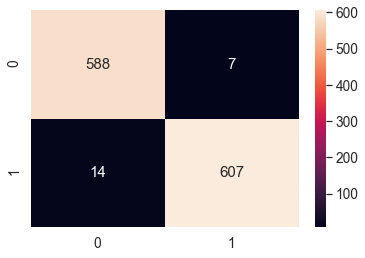

In [77]:
# confusion matrix for validation

conf_val = confusion_matrix(y_val_le, tree.predict(X_val_le))
sns.heatmap(conf_val, annot=True, fmt="d")

<AxesSubplot:>

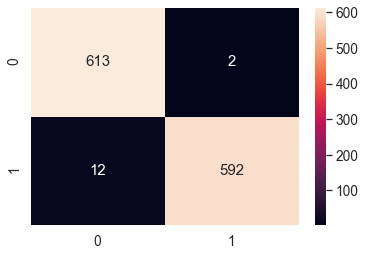

In [78]:
# confusion matrix for test

conf_test = confusion_matrix(y_test_le, tree.predict(X_test_le))
sns.heatmap(conf_test, annot=True, fmt="d")

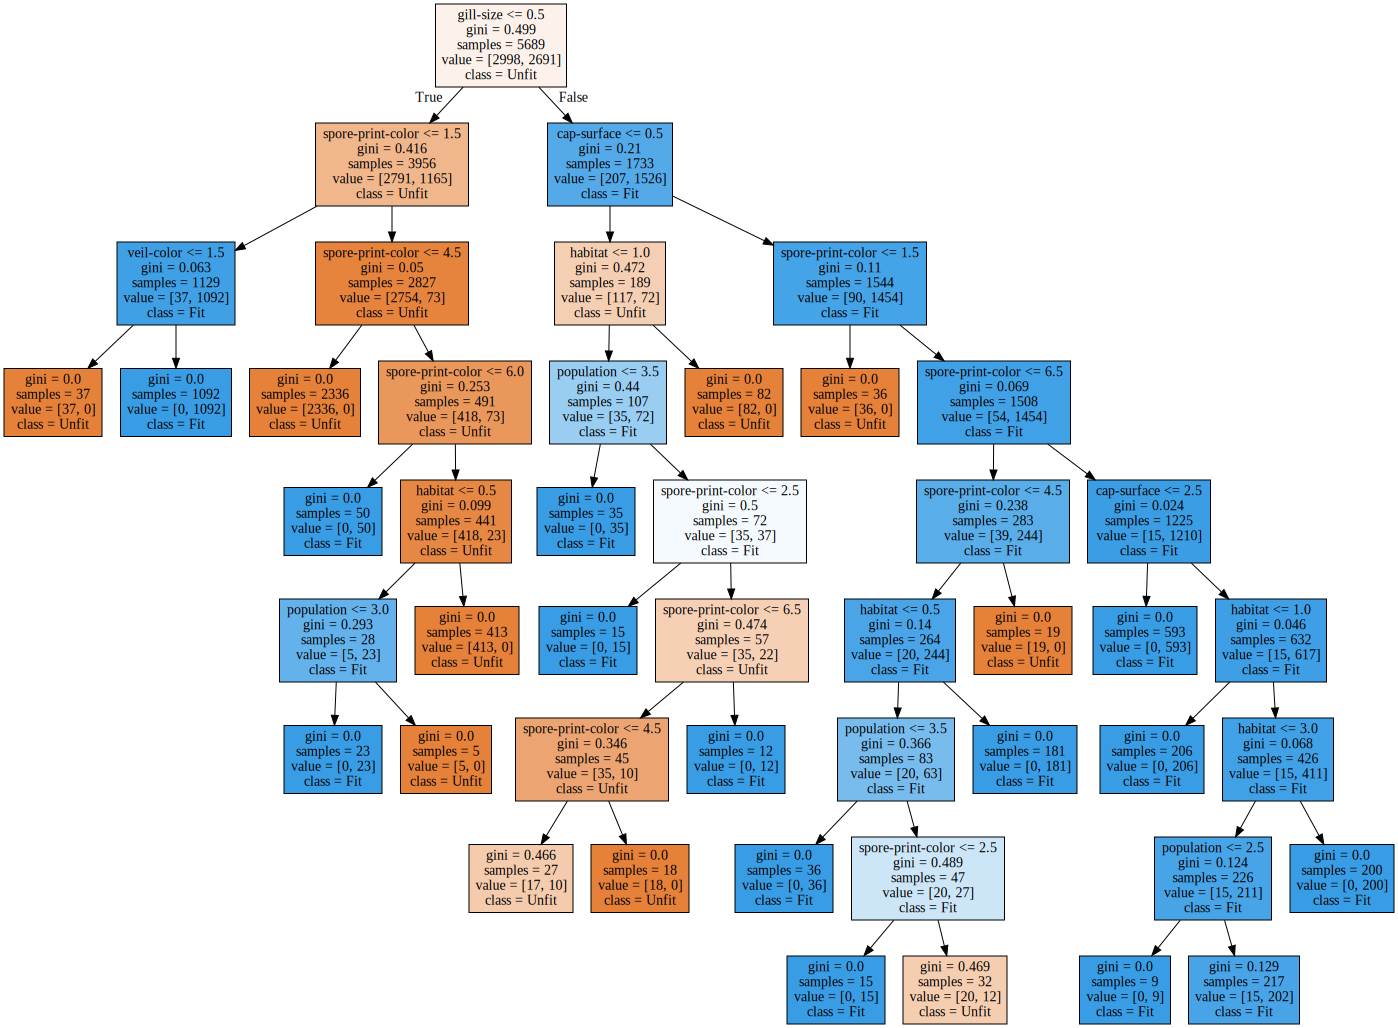

In [79]:
# plot of the tree used in this case

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(tree, X_le.columns.values, ['Unfit', 'Fit'])


# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train_le, y_train_le)
scores.at['forest','train accuracy'] = forest.score(X_train_le, y_train_le)
scores.at['forest','validation accuracy'] = forest.score(X_val_le, y_val_le)
scores.at['forest','test accuracy'] = forest.score(X_test_le, y_test_le)

<AxesSubplot:>

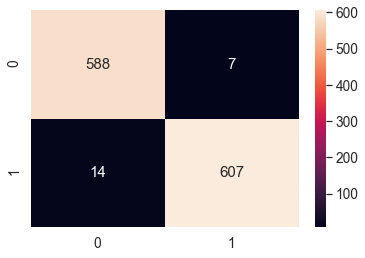

In [81]:
# confusion matrix for validation

conf_val = confusion_matrix(y_val_le, forest.predict(X_val_le))
sns.heatmap(conf_val, annot=True, fmt="d")

<AxesSubplot:>

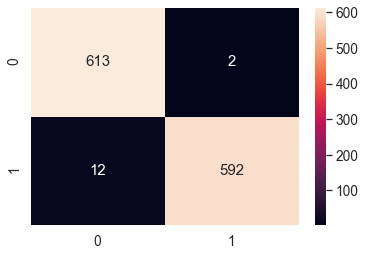

In [82]:
# confusion matrix for test

conf_test = confusion_matrix(y_test_le, forest.predict(X_test_le))
sns.heatmap(conf_test, annot=True, fmt="d")

# Scores to compare the accuracy of all models used 

In [83]:
scores

,train accuracy,validation accuracy,test accuracy
knn,0.993145,0.981908,0.987695
tree,0.993496,0.98273,0.988515
forest,0.993496,0.98273,0.988515


I could not use the hot-one encoding in this example because the dataset has too many different feature types and it would cause the model to be very complexed with over 100 columns in the dataset.

<h1>Hyperparameter Search</h1>
 

### KNN 

In [84]:
# here we are using a range of 'k' parameters for KNN model to test what is the best 'k'

from tqdm import tqdm

t_best_k = None
t_best_accuracy = None
v_best_k = None
v_best_accuracy = None
for k in tqdm(range(1,10)):
    neigh = KNeighborsClassifier(k)
    neigh.fit(X_train_le, y_train_le)
    v_accuracy = neigh.score(X_val_le, y_val_le)
    if v_best_accuracy is None or v_accuracy > v_best_accuracy:
        v_best_k = k
        v_best_accuracy = v_accuracy
    t_accuracy = neigh.score(X_test_le, y_test_le)
    if t_best_accuracy is None or t_accuracy > t_best_accuracy:
        t_best_k = k
        t_best_accuracy = t_accuracy

print(f'Best validation accuracy: {t_best_accuracy}')
print(f'Best k: {k}')

print(f'Best test accuracy: {t_best_accuracy}')
print(f'Best k: {k}')

v_neigh = KNeighborsClassifier(v_best_k)
v_neigh.fit(X_train_le, y_train_le)

t_neigh = KNeighborsClassifier(t_best_k)
t_neigh.fit(X_train_le, y_train_le)

scores.at['knn_opt','train accuracy'] = v_neigh.score(X_train_le, y_train_le)
scores.at['knn_opt','validation accuracy'] = v_neigh.score(X_val_le, y_val_le)
scores.at['knn_opt','test accuracy'] = t_neigh.score(X_test_le, y_test_le)

100%|██████████| 9/9 [00:00<00:00, 14.08it/s]


Best validation accuracy: 0.9950779327317474
Best k: 9
Best test accuracy: 0.9950779327317474
Best k: 9


### Decision Tree


In [85]:
# here we are using a nested for loop to test the best hyperparameters for 'max_depth', 'min_samples_split', 'min_samples_leaf' for the best results 
# accuracy is tested on validation set only 
best_params = None
best_tree = None
best_accuracy = None
for max_depth in tqdm(range(2,15)):
    for min_samples_split in range(2, 10):
        for min_samples_leaf in range(1, 10):
            for criterion in ('gini', 'entropy'):
                params = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}
                tree = DecisionTreeClassifier(**params)
                tree.fit(X_train_le, y_train_le)
                accuracy = tree.score(X_val_le, y_val_le)
                if best_accuracy is None or accuracy > best_accuracy:
                    best_params = params
                    best_tree = tree
                    best_accuracy = accuracy

print(f'Best tree validation accuracy: {best_accuracy}')
print(f'Best tree validation params: {best_params}')

100%|██████████| 13/13 [00:06<00:00,  1.88it/s]

Best tree validation accuracy: 0.9884868421052632
Best tree validation params: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [86]:
# here we are using a nested for loop to test the best hyperparameters for 'max_depth', 'min_samples_split', 'min_samples_leaf' for the best results 
# accuracy is tested on test set only 
best_params = None
best_tree = None
best_accuracy = None
for max_depth in tqdm(range(2,15)):
    for min_samples_split in range(2, 10):
        for min_samples_leaf in range(1, 10):
            for criterion in ('gini', 'entropy'):
                params = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}
                tree = DecisionTreeClassifier(**params)
                tree.fit(X_train_le, y_train_le)
                accuracy = tree.score(X_test_le, y_test_le)
                if best_accuracy is None or accuracy > best_accuracy:
                    best_params = params
                    best_tree = tree
                    best_accuracy = accuracy

print(f'Best tree test accuracy: {best_accuracy}')
print(f'Best tree test params: {best_params}')

100%|██████████| 13/13 [00:07<00:00,  1.85it/s]

Best tree test accuracy: 0.9950779327317474
Best tree test params: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Random Forest

In [87]:
# adding the new results to the table
tree = DecisionTreeClassifier(**best_params)
tree.fit(X_train_le, y_train_le)
scores.at['tree_opt','train accuracy'] = tree.score(X_train_le, y_train_le)
scores.at['tree_opt','validation accuracy'] = tree.score(X_val_le, y_val_le)
scores.at['tree_opt','test accuracy'] = tree.score(X_test_le, y_test_le)

In [88]:
# here we are using a nested for loop to test the best hyperparameters for 'max_depth', 'min_samples_split', 'min_samples_leaf' for the best results 
# also, i am using CPU hyper threading (n_jobs = -1) to accelorate the proccess
# accuracy is tested on validation set only
n_jobs = -1
best_params = None
best_forest = None
best_accuracy = None
for max_depth in tqdm(range(2,15)):
    for min_samples_split in range(2, 10):
        for min_samples_leaf in range(1, 10):
            for criterion in ('gini', 'entropy'):
                params = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'n_jobs': n_jobs}
                forest = RandomForestClassifier(**params)
                forest.fit(X_train_le, y_train_le)
                accuracy = forest.score(X_val_le, y_val_le)
                if best_accuracy is None or accuracy > best_accuracy:
                    best_params = params
                    best_forest = forest
                    best_accuracy = accuracy

print(f'Best forest validation accuracy: {best_accuracy}')
print(f'Best forest validation params: {best_params}')

100%|██████████| 13/13 [03:53<00:00, 17.94s/it]

Best forest validation accuracy: 0.984375
Best forest validation params: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_jobs': -1}


In [102]:
# here we are using a nested for loop to test the best hyperparameters for 'max_depth', 'min_samples_split', 'min_samples_leaf' for the best results 
# also, i am using CPU hyper threading (n_jobs = -1) to accelorate the proccess
# accuracy is tested on test set only
n_jobs = 3
best_params = None
best_forest = None
best_accuracy = None
for max_depth in tqdm(range(2,15)):
    for min_samples_split in range(2, 10):
        for min_samples_leaf in range(1, 10):
            for criterion in ('gini', 'entropy'):
                params = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'n_jobs': n_jobs}
                forest = RandomForestClassifier(**params)
                forest.fit(X_train_le, y_train_le)
                accuracy = forest.score(X_test_le, y_test_le)
                if best_accuracy is None or accuracy > best_accuracy:
                    best_params = params
                    best_forest = forest
                    best_accuracy = accuracy

print(f'Best forest test accuracy: {best_accuracy}')
print(f'Best forest test params: {best_params}')

  8%|▊         | 1/13 [00:23<04:44, 23.73s/it]


KeyboardInterrupt: 

In [90]:
# adding the new results to the table
forest = RandomForestClassifier(**best_params)
forest.fit(X_train_le, y_train_le)
scores.at['forest_opt','train accuracy'] = forest.score(X_train_le, y_train_le)
scores.at['forest_opt','validation accuracy'] = forest.score(X_val_le, y_val_le)
scores.at['forest_opt','test accuracy'] = forest.score(X_test_le, y_test_le)

# Scores to compare the accuracy of all models used including best hyperparameters

In [91]:
scores.reindex(['knn','knn_opt','tree','tree_opt','forest','forest_opt'])

,train accuracy,validation accuracy,test accuracy
knn,0.993145,0.981908,0.987695
knn_opt,0.99086,0.988487,0.995078
tree,0.993496,0.98273,0.988515
tree_opt,0.99086,0.988487,0.995078
forest,0.993496,0.98273,0.988515
forest_opt,0.98875,0.981908,0.991797
